# Équations différentielles ordinaires (EDO)

## L'épaisseur de mousse de bière
Reprenons l'exemple de la [vitesse de décroissance de l'épaisseur de mousse de bière](https://www.tf.uni-kiel.de/matwis/amat/iss/kap_2/articles/beer_article.pdf). Cet article montre que la hauteur de la mousse $h(t)$ suit une loi de décroissance :

$$ \frac{\text{d}h}{\text{d}t}(t) = -\frac{h(t)}{\tau}$$

Afin de trouver une solution particulière à cette équation, nous spécifions la condition initiale suivante en $t_0 = 0$ :

$$ h(t_0) = h_0 = 3 \ \text{cm}$$

et la valeur du paramètre :

$$ \tau = 123 \ \text{s} $$

Créons des variables `h0` et `t0` qui contiennent les conditions initiales, et une variable `tau` qui contient le paramètre :

In [1]:
# Condition initiale
t0 = 0 # s
h0 = 3 # cm

# Paramètre
tau = 123 # s

Comment trouver la fonction $h(t)$ grâce à une méthode numérique ?

## La formule de Taylor
La loi de décroissance nous donne la dérivée de la fonction $h(t)$. Nous savons que la dérivée en un point est le coefficient directeur de la tangente de la courbe en ce point. Nous pouvons donc utiliser la loi de décroissance pour connaître le coefficient directeur de la tangente au point initial.

Pour cela, écrivons une fonction python qui représente la loi de décroissance :

In [2]:
# Loi de décroissance
def derivee_h(h, t):
    '''
        Loi de décroissance dh/dt (t) = - h / tau
    '''
    return -h / tau

<div class="alert alert-info">

**La variable t**

Nous avons mis comme 2ème argument de la fonction `derivee_h(h, t)` le temps $t$, alors que la loi de décroissance ne dépend pas explicitement de $t$. Cependant, en toute généralité, il est possible que le temps intervienne explicitement dans l'expression de la dérivée, donc on prendra l'habitude de l'écrire explicitement dans les arguments de la fonction.

</div>

La dérivée de $h$ en $(h_0,t_0)$ est :

In [3]:
print(derivee_h(h0, t0), 'cm/s')

-0.024390243902439025 cm/s


D'après la formule de Taylor, on peut écrire au voisinage de $t_0$ :
$$ h(t) \approx h_0 + (t-t_0) \times \frac{\mathrm{d}h}{\mathrm{d}t} (t_0)$$

Utilisons la formule de Taylor pour calculer la valeur de la fonction $h_1$ en $t_1 = 10\mathrm{~s}$ :

In [4]:
t1 = 10 # s

# Application de la formule de Taylor
h1 = h0 + (t1 - t0) * derivee_h(h0, t0)

# Affichage de h1
print(h1, 'cm')

2.7560975609756095 cm


### Exercice
Appiquer la formule de Taylor au voisinage de $t_1$ pour calculer la valeur $h_2$ au temps $t=20$ s.

D'après la formule de Taylor, on peut écrire au voisinage de t1 :
$$ h(t) \approx h_1 + (t-t_1) \times \frac{\text{d}h}{\text{d}t} (t_1)$$

In [5]:
t2 = 20 # s

# Application de la formule de Taylor
h2 = h1 + (t2 - t1) * derivee_h(h1, t1)

# Affichage de h1
print(h2, 'cm')

2.532024588538568 cm


## La méthode d'Euler
On comprends alors qu'il est possible de calculer les valeurs de la fonction de proche en proche. Pour cela nous allons bien sûr utiliser une boucle `for`. C'est la méthode d'Euler.

Pour les valeurs successives du temps $t$, nous allons utiliser un pas constant :

In [6]:
import numpy as np

# Paramètres
start = 0    # s
end = 300.0  # s
step = 10    # s

# Création du tableau temps
interval = end - start                     # Intervalle
num_points = int(interval / step) + 1      # Nombre d'éléments
t = np.linspace(start, end, num_points)    # Tableau temps t

Nous appliquons alors la formule de Taylor à chaque itération :

In [7]:
# Initialisation du tableau h
h = np.empty(t.shape)

# Condition initiale
h[0] = h0 

# Boucle for
for i in range(num_points - 1):
    h[i + 1] = h[i] + step * derivee_h(h[i], t[i])

<div class="alert alert-info">

**Combien de pas ?**

On remarque que le nombre de pas pour aller de $0\mathrm{~s}$ à $300\mathrm{~s}$ avec un pas de $10\mathrm{~s}$ est égal à $30$, alors que le nombre d'éléments des tableaux `h` et `t` est $31$.
</div>

Réprésentons graphiquement la fonction $h(t)$ obtenue numériquement, et la solution analytique :

$$ h(t) = h_0 \exp{\left(-\frac{t}{\tau}\right)} $$

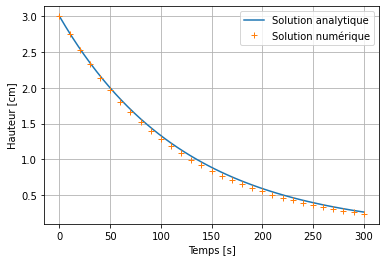

In [8]:
import matplotlib.pyplot as plt

# Solution analytique
t_analytique = np.linspace(start, end)
h_analytique = h0 * np.exp(-t_analytique / tau)

# Représentation graphique
plt.plot(t_analytique, h_analytique, label = 'Solution analytique')
plt.plot(t, h, '+', label = 'Solution numérique')
plt.xlabel('Temps [s]')
plt.ylabel('Hauteur [cm]')
plt.grid()
plt.legend()
plt.show()

## Erreur d'intégration
Afin d'étudier l'erreur entre la solution numérique et la solution analytique, créons une fonction qui applique la méthode d'Euler pour des valeurs du pas différentes :

In [9]:
def Euler(step):
    '''
        Application de la méthode d'Euler pour un pas `step` donné
    '''
    # Paramètres
    start = 0    # s
    end = 300.0  # s

    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau h
    h = np.empty(num_points)

    # Condition initiale
    h[0] = h0 

    # Boucle for
    for i in range(num_points - 1):
        h[i + 1] = h[i] + step * derivee_h(h[i], t[i])

    # Argument de sortie
    return t, h

et une fonction qui calcule la solution analytique pour un temps $t$ :

In [10]:
# Fonction python qui représente la solution analytique
def h_analytique(t):
    '''
        Solution analytique pour la hauteur de la mousse
    '''
    return h0 * np.exp(-t / tau)

Maintenant, calculons l'erreur relative entre les solutions analytique et numérique pour des valeurs du pas comprises entre $10^{-3}\mathrm{~s}$ et $10\mathrm{~s}$. 

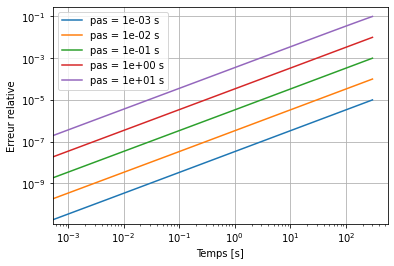

In [11]:
# Répartition logarithmique des valeurs de step
step = np.logspace(-3, 1, 5) # s

# Boucle sur step
for i in range(step.size):
    t_numerique, h_numerique = Euler(step[i])
    erreur = np.abs((h_numerique - h_analytique(t_numerique)) / h_analytique(t_numerique))
    plt.loglog(t_numerique, erreur, label = "pas = {:5.0e} s".format(step[i]))
plt.xlabel('Temps [s]')
plt.ylabel('Erreur relative')
plt.grid()
plt.legend()
plt.show()

On voit que l'augmentation de l'erreur avec le temps ne dépend pas du pas, elle est proportionnelle à $t$. Pour un temps $t$ donné, on voit que l'erreur est proportionnelle au pas.

## Particule chargée
Considérons une particule chargée dans un champ magnétique uniforme constant $B$. On considère le système régissant les composantes $v_x(t)$ et $v_y(t)$, dans le plan orthogonal au champ magnétique supposé dirigé suivant $z$, de la vitesse d'une particule de charge $q$ et de masse $m$ :

\begin{eqnarray} 
    \dfrac{\text{d} v_x}{\text{d}t} &=&  \omega v_y \\[1em]
    \dfrac{\text{d} v_y}{\text{d}t} &=& -\omega v_x
\end{eqnarray}

où $\omega = qB/m$ est la pulsation gyromagnétique. On prendra $\omega = 1\mathrm{~s^{-1}}$.

In [12]:
# Paramètre
omega = 1 # s^-1

Nous avons ici un système d'EDO couplées, qui peut être résolu de la même façon que l'EDO simple précédente. Il suffit d'appliquer la formule de Taylor aux deux équations. Prenons les temps

$$t_i=t_0+i\Delta t \ ,\ i = 0,1,2, \dots, N$$

où $\Delta t$ est le pas, et $N$ le nombre de pas. Alors :

\begin{eqnarray} 
    v_x (t_{i+1}) &\approx& v_x (t_i) + \Delta t \dfrac{\text{d} v_x}{\text{d}t} (t_i) \\[1em]
    v_y (t_{i+1}) &\approx& v_y (t_i) + \Delta t \dfrac{\text{d} v_y}{\text{d}t} (t_i)
\end{eqnarray}

En définissant le vecteur $\vec{v} = (v_x,v_y)$, on peut écrire la formule de Taylor vectorielle :

$$ \vec{v} (t_{i+1}) \approx \vec{v} (t_i) + \Delta t \dfrac{\text{d} \vec{v}}{\text{d}t} (t_i) $$

On définit alors la fonction python :

In [13]:
# EDO
def derivee_v(v, t):
    '''
        Soit v = (v0, v1)
        Loi vectorielle sur la vitesse : d(v0, v1)/dt = omega * (v1, -v0)
    '''
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    
    # Dérivée de la vitesse
    dv[0] = omega * v[1]
    dv[1] = -omega * v[0]

    return dv

On définit alors la fonction qui applique la méthode d'Euler suivante :

In [14]:
def Euler(start, end, step, v_ini, derivee):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((2, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

On voit que maintenant on utilise un tableau de dimensions `(2, num_points)` pour représenter le vecteur $\vec{v}(t)$, et donc il faut adapter le calcul de la formule de Taylor en conséquence. On peut aussi facilement adapter cette fonction pour un nombre de dimensions plus grand que 2.

Résolvons maintenant cette EDO couplée pour des conditions initiales $\vec{v} = (0.1,0.0)\mathrm{~m\cdot s^{-1}}$, entre $0$ et $10\mathrm{~s}$, et un pas de $0.001\mathrm{~s}$ :

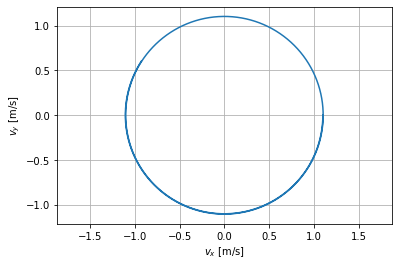

In [15]:
# Conditions initiales
v_ini = np.array([1.1, 0.0]) # m.s^-1

# Méthode d'Euler
t, v = Euler(0, 10, 0.001, v_ini, derivee_v)

# Représentation de la solution dans le plan (v_x, v_y)
plt.plot(v[0], v[1])
plt.xlabel('$v_x$ [m/s]')
plt.ylabel('$v_y$ [m/s]')
plt.axis("equal") # Pour avoir des axes isométriques
plt.grid()

## Le pendule simple
On considère un pendule constitué par une particule de masse $m$ fixée à l'extrémité d'une tige rigide de masse négligeable et de longueur $L$ reliée à un support fixe.

Au temps $t$, la force qui s'exerce sur la particule perpendiculairement à la tige est donnée par $F(t) = m g \sin \theta$, où $\theta$ est l'angle entre la tige et la verticale. En posant $k = \sqrt{g / L}$, l'équation du mouvement de la particule est :

$$
\dfrac{\text{d}^2 \theta}{\text{d}t^2} (t) = -  k^2 \sin \theta (t) 
$$

Dans la limite des petites oscillations $|\theta(t)| \ll 1$, on a $\sin \theta\approx\theta$. L'équation d'évolution devient :

$$
\dfrac{\text{d}^2 \theta}{\text{d}t^2} (t) = -  k^2 \theta (t) 
$$

C'est une EDO d'ordre 2. Or, il est toujours possible, avec un changement de variable approprié, de ramener une EDO d'ordre $N$ à un système de $N$ EDO couplées d'ordre 1. Nous allons l'illustrer avec cet exemple.

Posons :

\begin{eqnarray}
    u_0 &=& \theta \\
    u_1 &=& \dfrac{\text{d} \theta}{\text{d}t}
\end{eqnarray}

En appliquant ce changement de variables, l'équation d'évolution peut se réécrire de façon complètement équivalente :

\begin{eqnarray}
    \frac{\text{d}u_0}{\text{d}t}&=& u_1 \\[1em]
    \frac{\text{d}u_1}{\text{d}t} &=& -k^2 u_0
\end{eqnarray}

Ce système de 2 EDO couplées peut être résolu de la même façon que le problème précédent de la particule chargée. Il faut juste écrire la fonction dérivée correspondante :

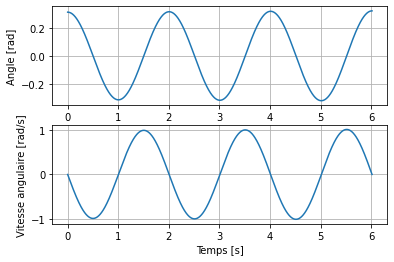

In [16]:
# Paramètre
L = 1 # Longueur (m)
g = 9.81 # Pesanteur (m.s^-2)
kp = np.sqrt(g / L)  # Pulsation (notée k dans l'énoncé)
Tp = 2 * np.pi / kp # Période (s)

# EDO
def derivee_u (u, t):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -k ** 2 * u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)
    
    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -kp ** 2 * u[0]

    return du

# Conditions initiales
u_ini = np.array([np.pi / 10, 0.0])

# Méthode d'Euler
t, u = Euler(0, 3. * Tp, 0.001, u_ini, derivee_u)

# Représentation de la solution numérique
plt.subplot(2, 1, 1)
plt.plot(t, u[0, :])
plt.ylabel('Angle [rad]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, u[1, :])
plt.ylabel('Vitesse angulaire [rad/s]')
plt.xlabel('Temps [s]')
plt.grid()

On note que dans l'approximation des petits angles, la quantité 

\begin{equation}
    C \approx \frac{ \dot{{\theta} }^2}{2} + k^2\frac{ \theta^2 }{2} 
\end{equation}

est proportionelle à l'énergie, qui doit être conservée. La conservation de cette quantité peut être un premier critère de la qualité de l'algorithme de résolution numérique.

Représentons cette quantité pour plusieurs valeurs du pas :

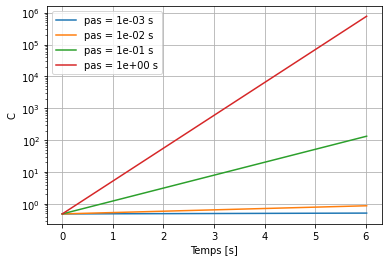

In [17]:
# Choix du tableau pour step = logarithmique
step = np.logspace(-3, 0, 4) # s

# Boucle sur step
for i in range(step.size):
    t, u = Euler(0, 3. * Tp, step[i], u_ini, derivee_u)
    C = u[1, :] ** 2 / 2 + kp ** 2 * u[0, :] ** 2 / 2
    plt.semilogy(t, C, label = "pas = {:5.0e} s".format(step[i]))
plt.xlabel('Temps [s]')
plt.ylabel('C')
plt.grid()
plt.legend()
plt.show()

On voit que plus le pas est petit et mieux l'énergie du système est conservée. De plus on voit que la non-conservation de l'énergie avec le temps augmente de façon exponentielle.